In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from load_net_structure import load_net_structure
from test_multiple_images_utils import *
from sklearn.metrics import accuracy_score
from tensorflow import keras
import time
import gc
import warnings
import scipy.io
import json
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import multiprocessing as mp
import os
import shutil
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # do not use GPU boost


This software is used to estimate the X and C perplexities for a given image.
 Please save your images on root folder. Then input the image names seperating by space
 eg: sample1.jpg sample2.jpg sample3.jpg
 Then, input their label names according to ImageNet labels respectively
 eg: n09229709, n09229709, n09428293
 If you only want to test C perplexity, please input: no label
 Then choose the faster testing mode or accurate testing mode
 For faster testing mode, please input: 1
 For accurate testing mode, please input: 2
 Then, input how many top confusion classes you want to get and how many threads you want to use.
Please input the image names, seperate by space: sample1.jpg sample2.jpg sample3.jpg sample4.jpg sample5.jpg
Please input the image labels, seperate by space: no label
Please input the image labels. 1 is faster, 2 is accurate: 2
How many top clasees you want to get?: 20
Your CPU has 12 threads.
How many threads you want to use to optimize?: 6
500 networks are used
c perpl

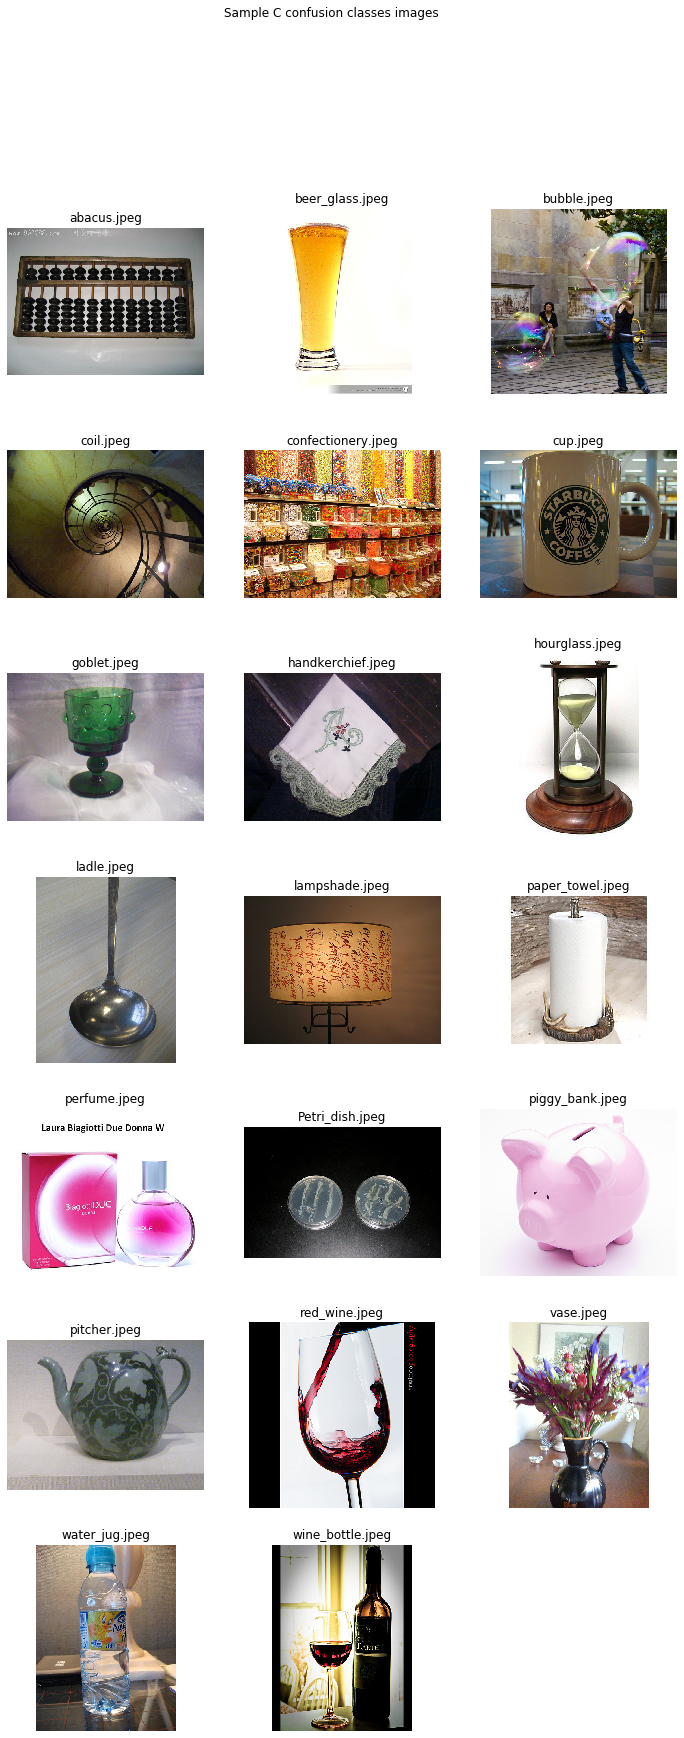

For image sample2.jpg :


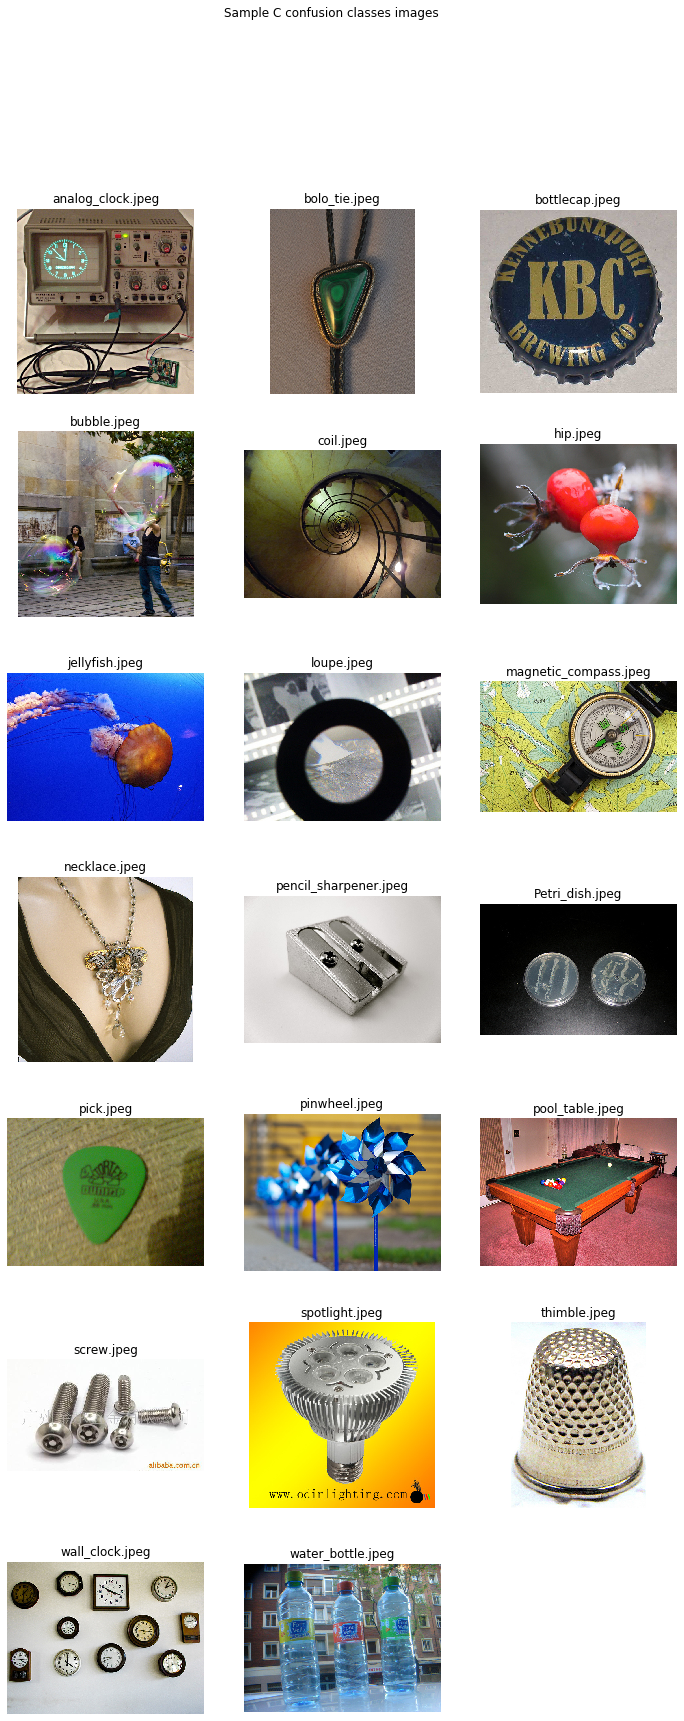

For image sample3.jpg :


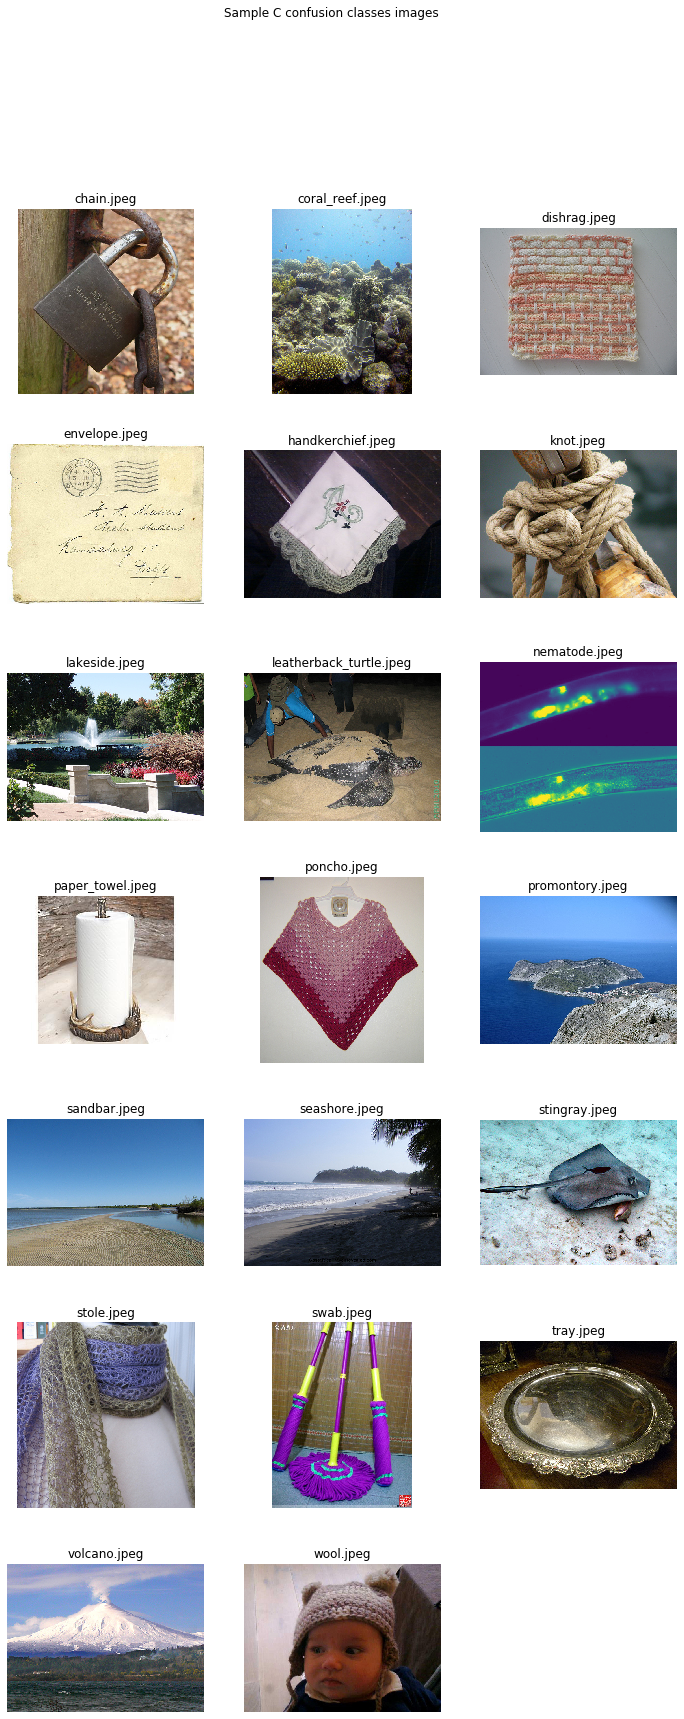

For image sample4.jpg :


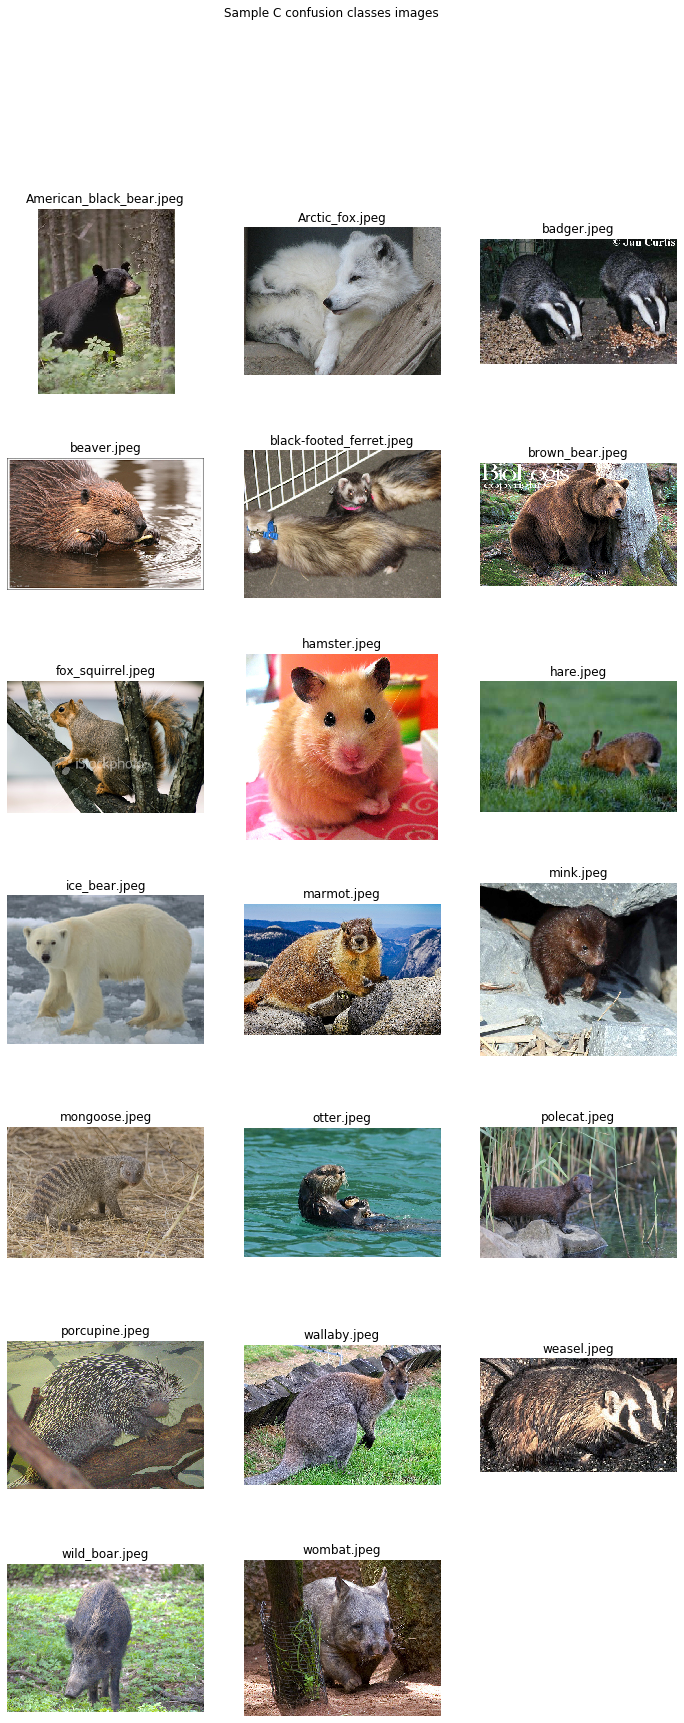

For image sample5.jpg :


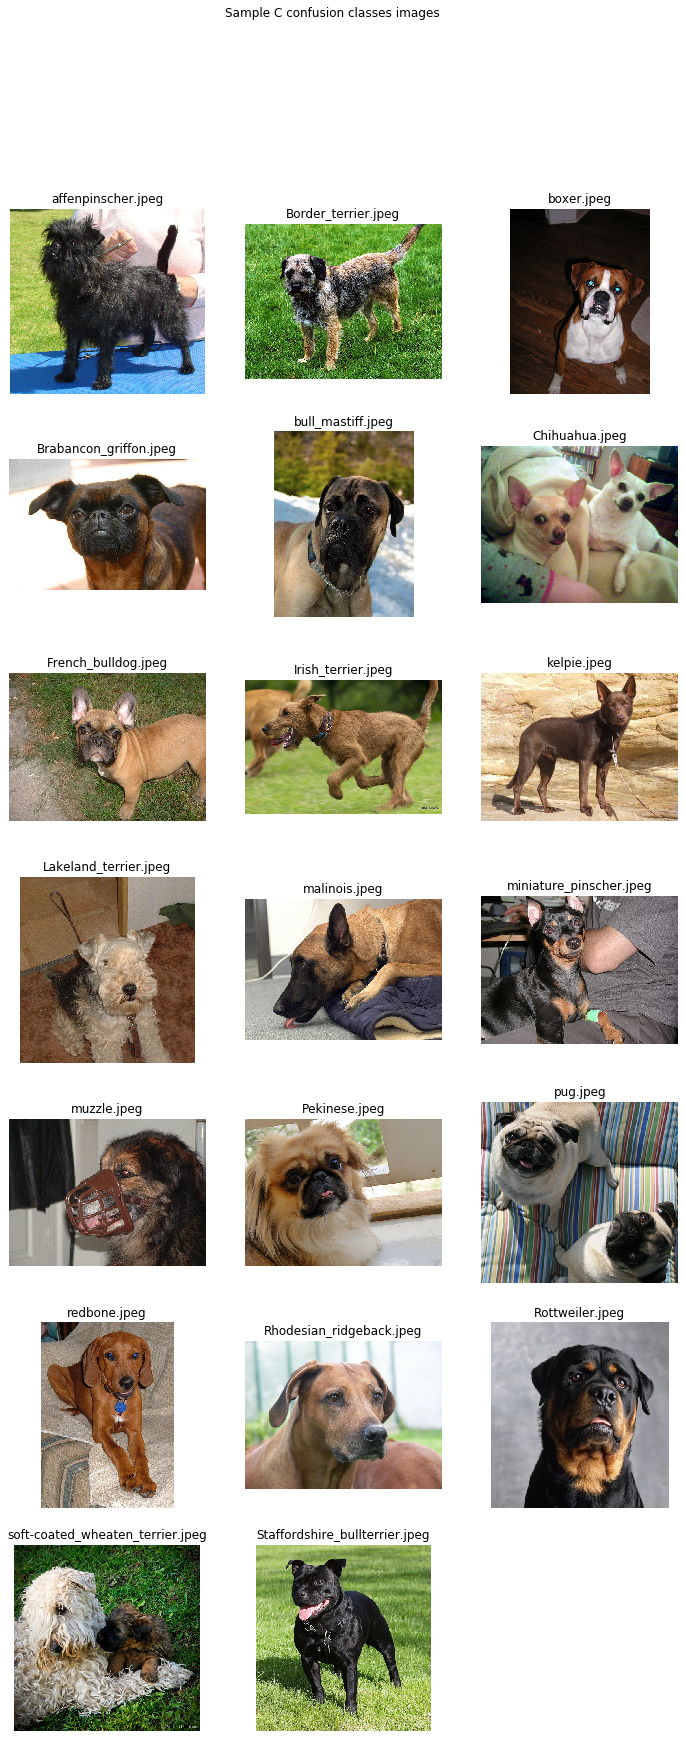

In [11]:
warnings.filterwarnings("ignore")
current_path = get_current_location()
how_many_threads = mp.cpu_count()
net_name_list = [
        ["ResNet50"],
        ["ResNet101"],
        ["DenseNet121"],
        ["DenseNet169"],
        ["DenseNet201"],
        ["EfficientNetB2"],
        ["EfficientNetB0"],
        ["Xception"],
        ["InceptionV3"],
        ["VGG16"],
]
net_name_list = net_name_list[::-1]

instruction = "This software is used to estimate the X and C perplexities for a given image.\n \
Please save your images on root folder. Then input the image names seperating by space\n \
eg: sample1.jpg sample2.jpg sample3.jpg\n \
Then, input their label names according to ImageNet labels respectively\n \
eg: n09229709, n09229709, n09428293\n \
If you only want to test C perplexity, please input: no label\n \
Then choose the faster testing mode or accurate testing mode\n \
For faster testing mode, please input: 1\n \
For accurate testing mode, please input: 2\n \
Then, input how many top confusion classes you want to get and how many threads you want to use."

print(instruction)

img_name = input("Please input the image names, seperate by space: ")
img_gt = input("Please input the image labels, seperate by space: ")
test_mode = input(
    "Please input the image labels. 1 is faster, 2 is accurate: ")
test_mode = int(test_mode)
how_many_top = input("How many top clasees you want to get?: ")
how_many_top = int(how_many_top)
print("Your CPU has %d threads." %how_many_threads)
how_many_threads = input("How many threads you want to use to optimize?: ")
how_many_threads = int(how_many_threads)
img_name = img_name.split(" ")

only_c = 0
if img_gt == "no label":
    image_number = len(img_name)
    img_gt = ["n09229709"] * image_number
    only_c = 1
else:
    img_gt = img_gt.split(" ")

if os.path.exists(current_path + "BatchTestRecord"):
    shutil.rmtree(current_path + "BatchTestRecord")
if os.path.exists(current_path + "BatchTestSampleImages"):
    shutil.rmtree(current_path + "BatchTestSampleImages")
if test_mode == 1:
    if os.path.exists(current_path + "BatchTestResult"):
        shutil.rmtree(current_path + "BatchTestResult")

multi_thread_optimize_test(img_name, net_name_list, test_mode, how_many_threads)
top_5_c, top_5_x, x_perplexity, c_perplexity = get_perplexity(
    img_name, img_gt, only_c, how_many_top)
get_example_images(img_name, top_5_c, "c")
print("\n")
if only_c != 1:
    get_example_images(img_name, top_5_x, "x")
    get_same_label_similar_images(img_name, img_gt, x_perplexity, c_perplexity, how_many_top)
if only_c == 1:
    images_folder_name = ["c"]
    describe = ["Sample C confusion classes images"]
elif only_c == 0:
    images_folder_name = ["c", "x", "similar_c_perplexity", "similar_x_perplexity"]
    describe = ["Sample C confusion classes images", "Sample X confusion classes images", 
                "Similar C perplexity images", "Similar X perplexity images"]
    
    
sample_images_path = current_path + "BatchTestSampleImages/"
for i in img_name:
    print("For image %s :" %i)
    name = i.split(".")[0]
    its_images_path = sample_images_path + name + "/confusion_class_samples/"
    for idx, j in enumerate(images_folder_name):
        specific_folder_path = its_images_path + j
        display_images(describe[idx], specific_folder_path)
    
    